## Task 01

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y
w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1, ¿cuál es la interpretación
del coeficiente 3w₂ en el contexto del modelo?

Representa el coeficiente de regresión sin estandarizar, el cual se calcula siguiendo el método de los mínimos cuadrados ordinarios y hay uno de dichos coeficientes para cada variable independiente.
Es el cambio estimado en unidades de "y" que se deriva del incremento de X₂ (variable independiente) cuando X₁ se mantiene constante.

https://physiostats.com/regresion-lineal-interpretacion-coeficientes/

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la
multicolinealidad a la interpretación de los coeficientes de regresión individuales?

La multicolinealidad en la regresión lineal ocurre cuando las variables que se usan para predecir están muy conectadas. Esto causa resultados extraños en las interpretaciones y reduce la precisión de los coeficientes. También dificulta la identificación de variables importantes y puede conducir a problemas numéricos. (Sevilla, A. 2019)

https://economipedia.com/definiciones/multicolinealidad.html

## Task 02

In [291]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

In [292]:
# Cargar el conjunto de datos desde el archivo CSV
file_path = 'dataset_phishing.csv'
df = pd.read_csv(file_path)

X = df[['length_url', 'nb_dots', 'nb_at', 'domain_age']]
y = df.iloc[:, -1]

print(X.head())
print(y.head())

# 1, 9, 10

   length_url  nb_dots  nb_at  domain_age
0          37        3      0          -1
1          77        1      0        5767
2         126        4      0        4004
3          18        2      0          -1
4          55        2      0        8175
0    legitimate
1      phishing
2      phishing
3    legitimate
4    legitimate
Name: status, dtype: object


In [293]:
# Codificar la variable de salida
dummies = pd.get_dummies(y)
concatenado = pd.concat([y, dummies], axis=1)
concatenado = concatenado.drop(['status', "legitimate"], axis=1)
y = concatenado


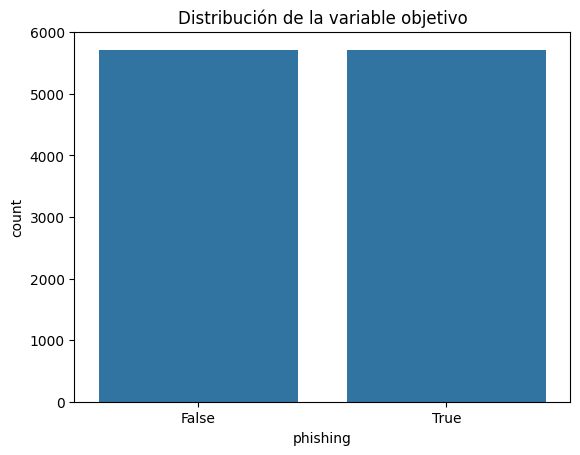

(11430, 4)
(11430, 1)


In [294]:
# Revisar si el dataset está balanceado
sns.countplot(x='phishing', data=y)
plt.title('Distribución de la variable objetivo')
plt.show()

print(X.shape)
print(y.shape)


In [295]:
X = X.values
y = y.values
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


- Cambiamos el formato de los datos en y

In [296]:
y
y = y[:, -1]
y

array([False,  True,  True, ..., False, False,  True])

In [297]:
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1) # cambiamos a distribución 80/20
#X_entreno, X_temp, y_entreno, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 1)

#### Normalizando los datos

In [298]:
"""from sklearn.preprocessing import StandardScaler
standar_x = StandardScaler()
X_entreno = standar_x.fit_transform(X_entreno)
X_prueba = standar_x.transform(X_prueba)
X_entreno
X_prueba"""

'from sklearn.preprocessing import StandardScaler\nstandar_x = StandardScaler()\nX_entreno = standar_x.fit_transform(X_entreno)\nX_prueba = standar_x.transform(X_prueba)\nX_entreno\nX_prueba'

- Recuerde definir de forma clara y razonada (es decir, diga el por qué de su elección) de una métrica de
desempeño principal

### Regresion Logistica - implementacion

In [299]:
gradiente = pd.DataFrame()
# 'length_url', 'nb_dots', 'nb_at', 'domain_age'
gradiente["datosX"] = pd.DataFrame(X_entreno[0])
gradiente["datosY"] = pd.DataFrame(y_entreno.astype(int))
gradiente["sigmoide"] = 0
gradiente["error"] = 0 
print(gradiente)

   datosX  datosY  sigmoide  error
0     127       1         0      0
1       4       1         0      0
2       0       0         0      0
3    3992       0         0      0


In [300]:
def gradiente_w(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])*gradiente["datosX"]
    derivative = gradiente["error"].mean()
    return(derivative) 

def gradiente_b(w, b):
    gradiente["sigmoide"] = 1/(1+np.exp(-(gradiente["datosX"]*w+b)))
    gradiente["error"] = (gradiente["sigmoide"]-gradiente["datosY"])
    derivative = gradiente["error"].mean()
    return(derivative) 


In [301]:
pasos_w = 0.01
pasos_b = 0.01
w = 0
b = 0

for i in range(1000):
    w = w - pasos_w*gradiente_w(w, b)
    b = b - pasos_b*gradiente_b(w, b)

print(w)
print(b)

c:\Users\aleaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


-1.0235716715067342
2.708465489186339


C:\Users\aleaz\AppData\Local\Temp\ipykernel_11724\3014082013.py:2: RuntimeWarning: overflow encountered in exp
  y = 1/(1+np.exp(-(x*w+b)))


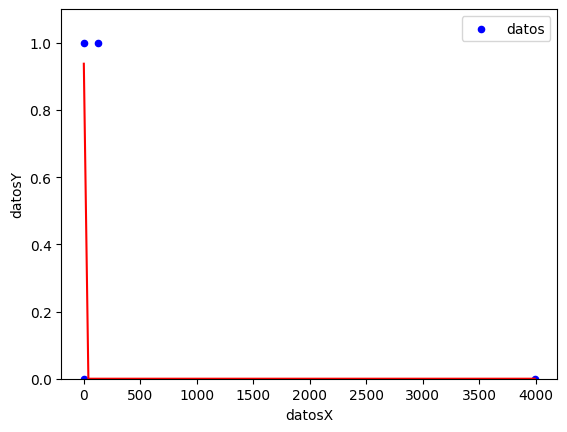

In [302]:
x = np.linspace(0, gradiente["datosX"].max(), 100)
y = 1/(1+np.exp(-(x*w+b)))

gradiente.plot.scatter(x="datosX",y="datosY", label="datos", color="blue")
plt.plot(x, y, '-r')
plt.ylim(0,gradiente["datosY"].max()*1.1)
plt.show()

### Regresión Logística - Librerias

In [303]:
# Importar Librerías Generales
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [304]:
# Leer el archivo CSV
df = pd.read_csv('dataset_phishing.csv')

# Es conveniente usar encoding para evitar problemas con los caracteres especiales (Legitimate y Phishing)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['status'] = le.fit_transform(df['status'])
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,0
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,1
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,1
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,0
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,0


Es importante elegir los datos de entrenamiento con cuidado. Se generaron gráficas de dispersión, que muestran la relación de cierta variable con status (Y). Se usaron las columnas que presentaban una diferencia en la distribución entre Legitimate y Phishing. 

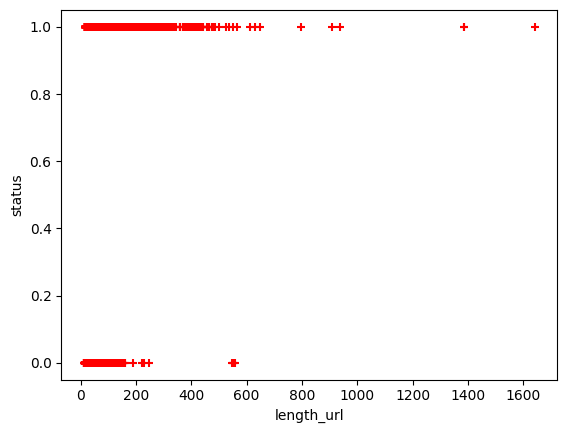

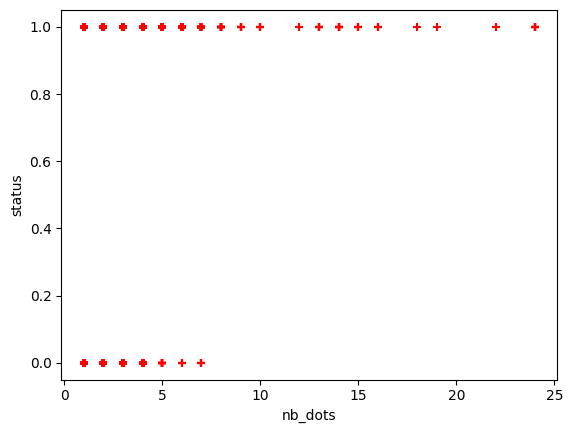

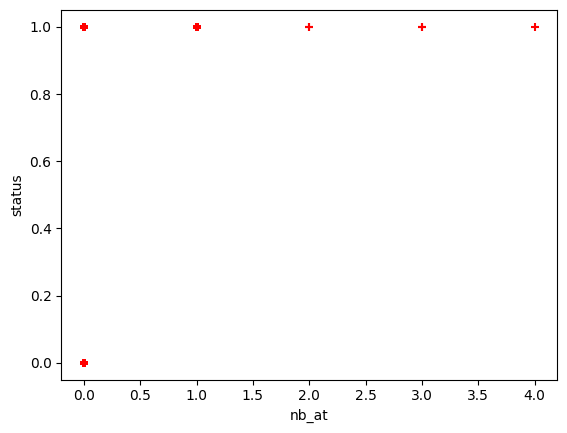

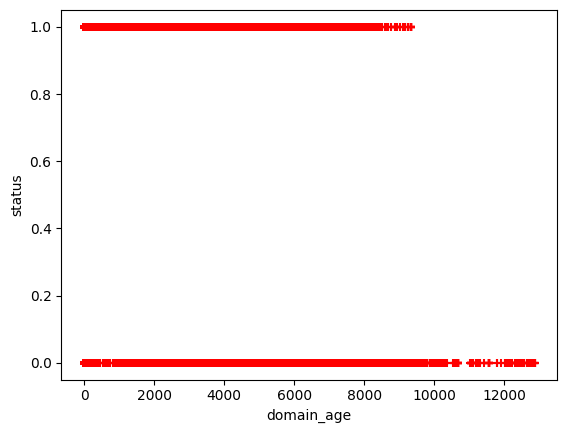

In [305]:
possible_columns = ['length_url', 'nb_dots', 'nb_at', 'domain_age']
for i in possible_columns:
    plt.scatter(df[i], df['status'], marker='+', color='red')
    plt.xlabel(i)
    plt.ylabel('status')
    plt.show()
# Conclusión, usaremos length_url, nb_dots, nb_at y domain_age para entrenar el modelo. 

In [306]:
# Dividir el conjunto de datos en variables independientes y dependientes
from sklearn.model_selection import train_test_split
X = df[['length_url', 'nb_dots', 'nb_at', 'domain_age']] # variables independientes possible_columns
y = df['status'] # variable dependiente

In [307]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # 80% entrenamiento, 20% prueba

In [308]:
# Comprobación: 
print(type(X))
print(type(y), '\n')

print(y.value_counts(), '\n\n', "Distribución de la variable objetivo")
print(X_train.shape)
print(X_test.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'> 

status
0    5715
1    5715
Name: count, dtype: int64 

 Distribución de la variable objetivo
(9144, 4)
(2286, 4)


In [309]:
# escalado de variables. 
# Se hace para que las variables tengan la misma importancia en el modelo

from sklearn.preprocessing import StandardScaler

StandardScaler = StandardScaler()

X_train_escaled = StandardScaler.fit_transform(X_train)
X_test_escaled = StandardScaler.transform(X_test)

print(X_train_escaled, '\n')
print(X_test_escaled)

[[-0.58209766 -0.36163344 -0.14335914  1.25527695]
 [ 0.18149079 -0.36163344 -0.14335914 -1.05816028]
 [-0.79746876 -0.36163344 -0.14335914  1.121314  ]
 ...
 [ 0.31854513 -0.36163344 -0.14335914  0.59995335]
 [-0.24925141  0.3788001  -0.14335914 -0.30204243]
 [-0.2688306  -0.36163344 -0.14335914 -1.3090188 ]] 

[[-0.52336008 -0.36163344 -0.14335914  0.69430707]
 [-0.13177626  0.3788001  -0.14335914 -1.3090188 ]
 [-0.6995728  -1.10206698 -0.14335914 -0.73548988]
 ...
 [ 0.04443646 -0.36163344 -0.14335914  1.40759541]
 [-0.34714736  0.3788001  -0.14335914  1.48037337]
 [-0.64083523 -0.36163344 -0.14335914 -0.09111518]]


In [310]:
# Ajuste del modelo
from sklearn.linear_model import LogisticRegression
regresion = LogisticRegression(random_state=0) # logistic regression
regresion.fit(X_train_escaled, y_train)

LogisticRegression(random_state=0)

In [311]:
# Predicción del modelo
model = regresion.predict(X_test_escaled)

# format as table. Use pandas. Highlight when real and predicted are different.
temptable = pd.DataFrame({'Real':y_test, 'Predicción':model})
if len(temptable) > 10:
    print(temptable.head(10))



      Real  Predicción
6406     0           0
4266     1           1
1238     1           0
2646     1           1
2217     0           0
2158     1           0
9823     0           0
4401     1           0
9349     0           0
1399     0           0


Arriba se puede observar una pequeña comparación entre las predicciones de nuestro modelo y lo real. 0 representa legitimate y 1 phishing. 

Accuracy:  70.87 %


Text(50.722222222222214, 0.5, 'Truth')

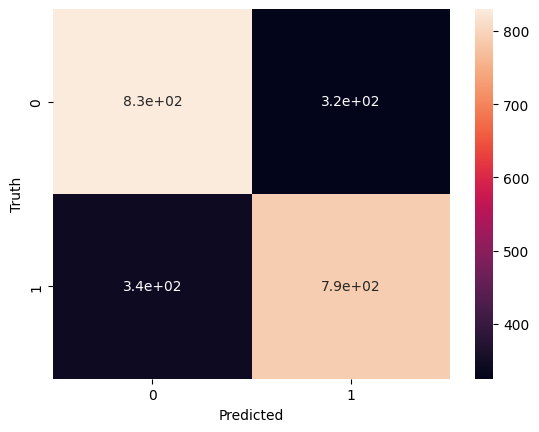

In [312]:
# matriz de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, model)
print(confusion_matrix, '\n')

accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) / (confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[0][1] + confusion_matrix[1][0])

# convert accuracy to percentage. Use only two decimal places
accuracy = accuracy*100
accuracy = round(accuracy, 2)

print("Accuracy: " , accuracy, "%")

import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')